## Exercise: Isolate clouds in a satellite image


Algorithm: 

- First, we remove the edges (city names, geopraphic contours, etc).


- Then, we isolated the clouds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean #reshape

In [3]:
from skimage.filters import roberts, sobel

In [4]:
image = io.imread("Satellite-No-Radar_20220621T20220621_1115.jpeg", as_gray= True)

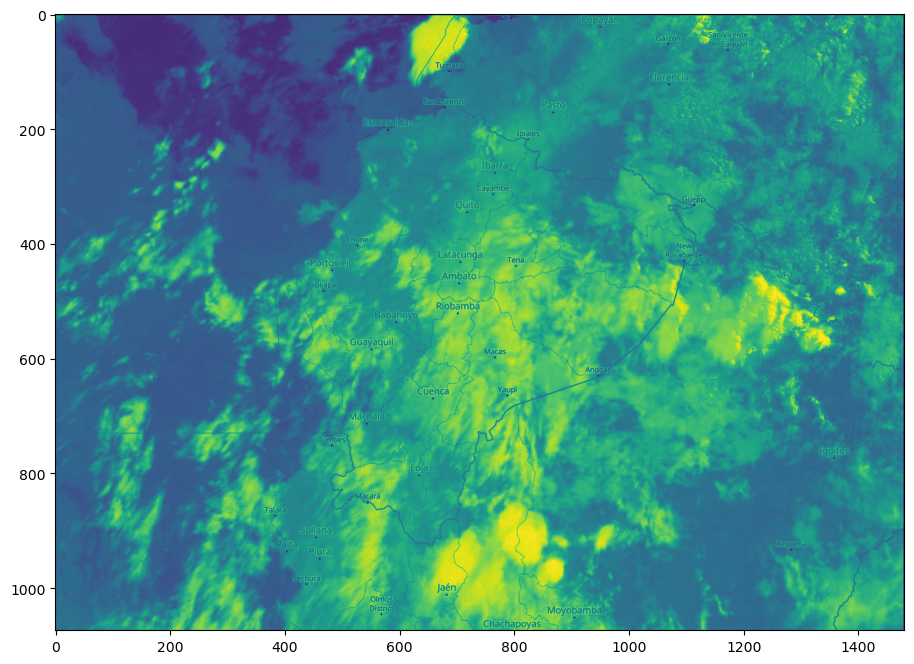

In [5]:
#%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image)
plt.show()

### 1. We apply the Roberts cross operator:

In [6]:
edge_filtered_image1 = roberts(image)

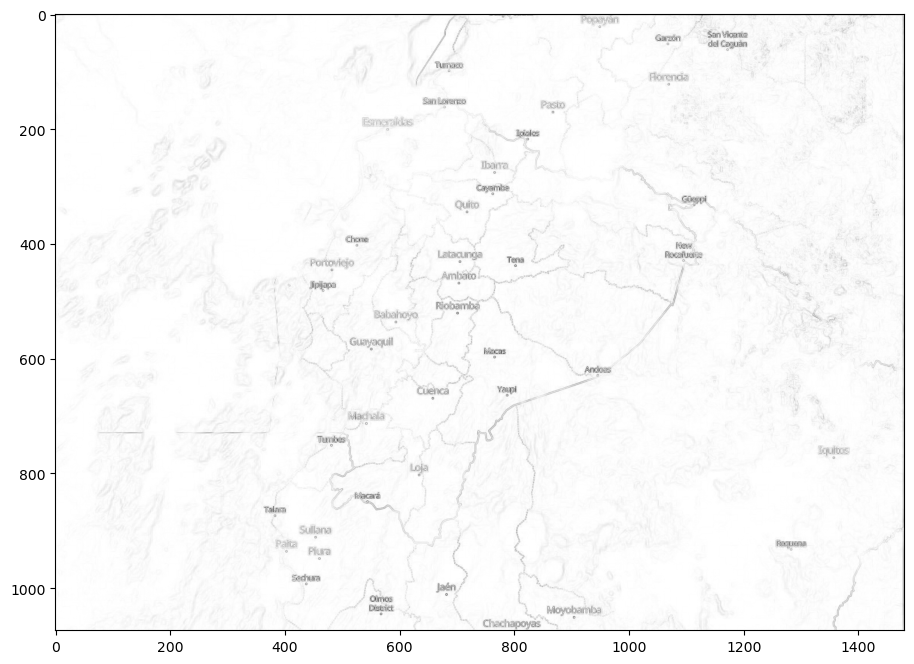

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(edge_filtered_image1, cmap= 'gray_r')
plt.show()

### 2. We isolate the edge pixels via tagging

In [8]:
print(np.max(edge_filtered_image1), np.min(edge_filtered_image1))

0.952978274059151 0.0


In [9]:
image1 = np.where(edge_filtered_image1 > 0.1, 1, 0)

print(np.unique(image1))

[0 1]


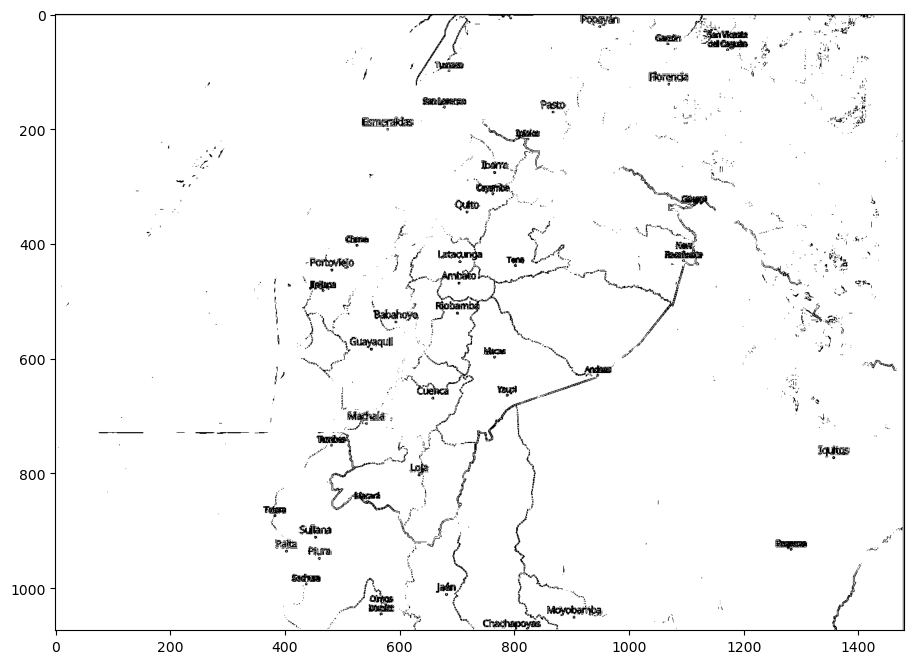

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image1, cmap= 'gray_r')
plt.show()

### Looks good, so now we can use NaNs

In [11]:
image1 = np.where(edge_filtered_image1 > 0.1, np.nan, 0)

print(np.unique(image1))

[ 0. nan]


### Defining a new image

In [12]:
new_image = image - image*image1

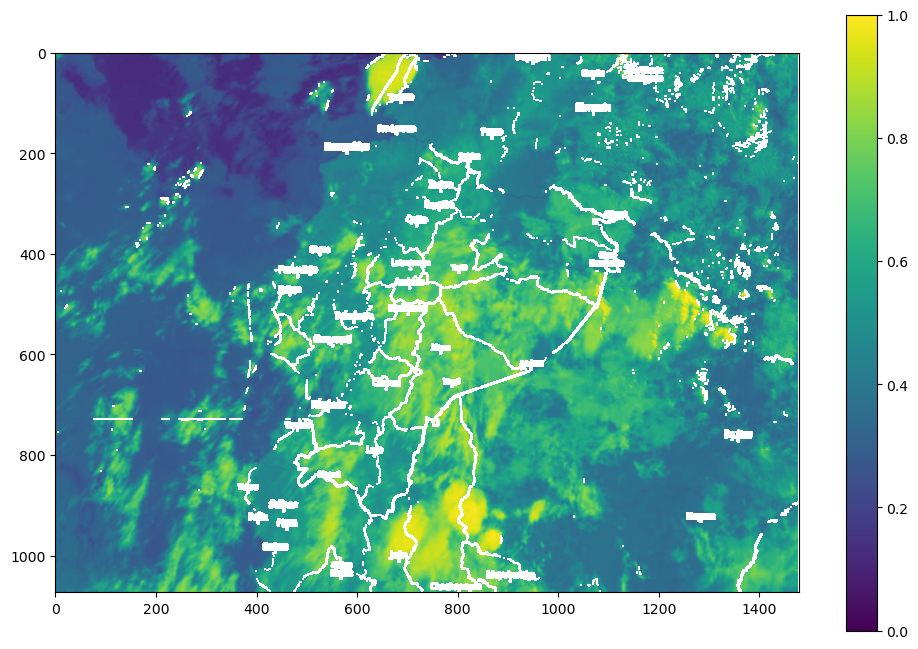

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

A = ax.imshow(new_image)

plt.colorbar(A)

plt.show()

## 2D interpolation


- griddata() to carry out 2D interpolation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html


- np.ma.masked_invalid() to mask NaNs.


- The bitwise NOT operator (~).

In [14]:
from scipy.interpolate import griddata

### Creating a mesh

In [15]:
# Create a grid

x = np.arange(0,  new_image.shape[1])
y = np.arange(0,  new_image.shape[0])

# create grid
xx, yy = np.meshgrid(x, y)

In [16]:
print(x.shape)
print(y.shape)

(1480,)
(1074,)


In [17]:
print(xx.shape)
print(yy.shape)

(1074, 1480)
(1074, 1480)


In [18]:
print(new_image)

[[0.00392157 0.00392157 0.00363882 ... 0.0025     0.00139882 0.01232235]
 [       nan        nan        nan ...        nan        nan 0.00196431]
 [0.64600941 0.65385255 0.65385255 ... 0.43748941        nan 0.02771882]
 ...
 [0.3823051  0.37838353 0.37446196 ... 0.45450784        nan 0.01227765]
 [0.37446196 0.37054039 0.37054039 ... 0.47049961        nan 0.01986078]
 [0.37446196 0.37054039 0.37054039 ... 0.45481333        nan 0.01986078]]


In [19]:
# Check if the NumPy array contains any NaN value

if(np.isnan(new_image).any()):
    print("The Array contain NaN values")
else:
    print("The Array does not contain NaN values")
    

The Array contain NaN values


In [20]:
# mask invalid values (nans)
array = np.ma.masked_invalid(new_image)

In [21]:
print(array)

[[0.00392156862745098 0.00392156862745098 0.0036388235294117647 ...
  0.0025 0.0013988235294117646 0.012322352941176472]
 [-- -- -- ... -- -- 0.001964313725490196]
 [0.6460094117647058 0.6538525490196078 0.6538525490196078 ...
  0.43748941176470585 -- 0.027718823529411765]
 ...
 [0.3823050980392157 0.3783835294117647 0.37446196078431376 ...
  0.4545078431372549 -- 0.012277647058823529]
 [0.37446196078431376 0.3705403921568628 0.3705403921568628 ...
  0.47049960784313727 -- 0.01986078431372549]
 [0.37446196078431376 0.3705403921568628 0.3705403921568628 ...
  0.4548133333333334 -- 0.01986078431372549]]


In [22]:
print(array.mask)

[[False False False ... False False False]
 [ True  True  True ...  True  True False]
 [False False False ... False  True False]
 ...
 [False False False ... False  True False]
 [False False False ... False  True False]
 [False False False ... False  True False]]


In [23]:
x1 = xx[~array.mask]
y1 = yy[~array.mask]

In [24]:
print(xx.size)
print(yy.size)

1589520
1589520


In [25]:
print(x1.shape)
print(y1.shape)

(1545371,)
(1545371,)


In [26]:
newarr = array[~array.mask]

print(newarr.shape)

(1545371,)


In [27]:
# numpy.ravel - returns flattened array

GD1 = griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')

In [28]:
print(GD1.shape)

(1074, 1480)


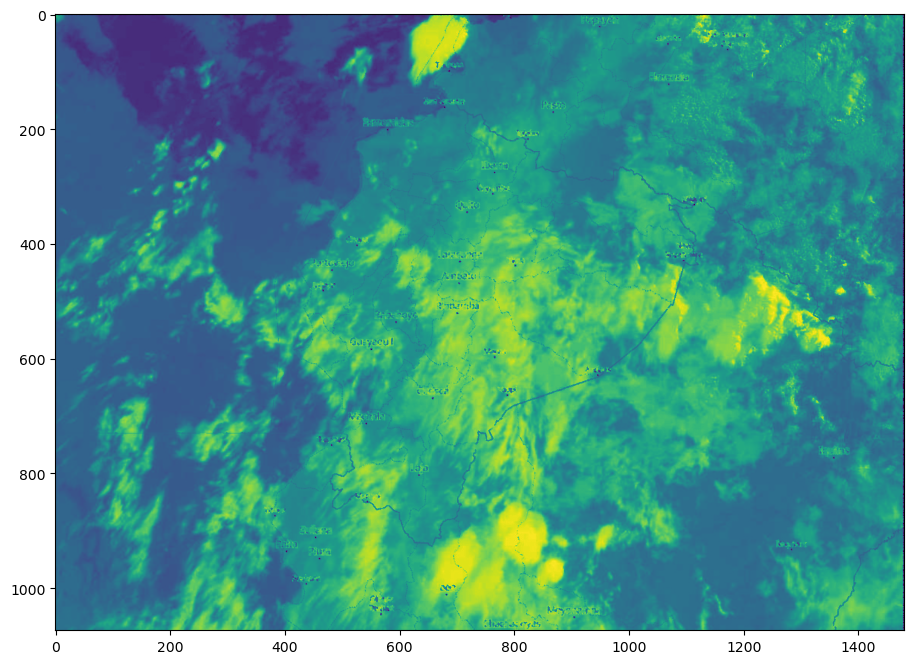

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(GD1)
plt.show()

In [30]:
image2 = np.where(edge_filtered_image1 > 0.01, np.nan, 0)

print(np.unique(image2))

[ 0. nan]


In [31]:
new_image2 = image - image*image2

In [32]:
x = np.arange(0,  new_image2.shape[1])
y = np.arange(0,  new_image2.shape[0])

# create grid
xx, yy = np.meshgrid(x, y)

# mask invalid values (nans)
array = np.ma.masked_invalid(new_image2)

#print(array.mask.shape)


#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

# numpy.ravel - returns flattened array

GD2 = griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')

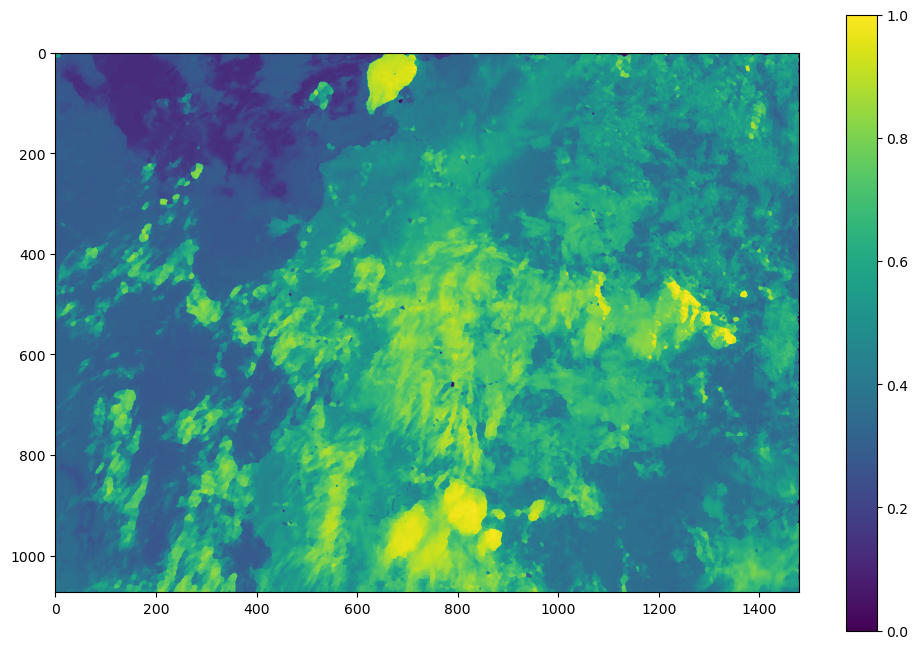

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
A = ax.imshow(GD2)
plt.colorbar(A)
plt.show()

# Isolating the clouds

In [34]:
print(GD2.shape)
print(GD2.size)

(1074, 1480)
1589520


In [35]:
GD2_1D = GD2.reshape(GD2.size, 1)
print(GD2_1D.shape)

(1589520, 1)


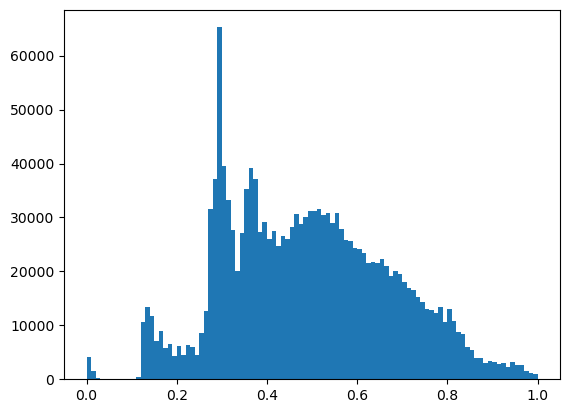

In [36]:
plt.hist(GD2_1D, bins=100)
plt.show()

In [37]:
image3 = np.where(GD2 < 0.65, np.nan, 1)

print(np.unique(image3))

[ 1. nan]


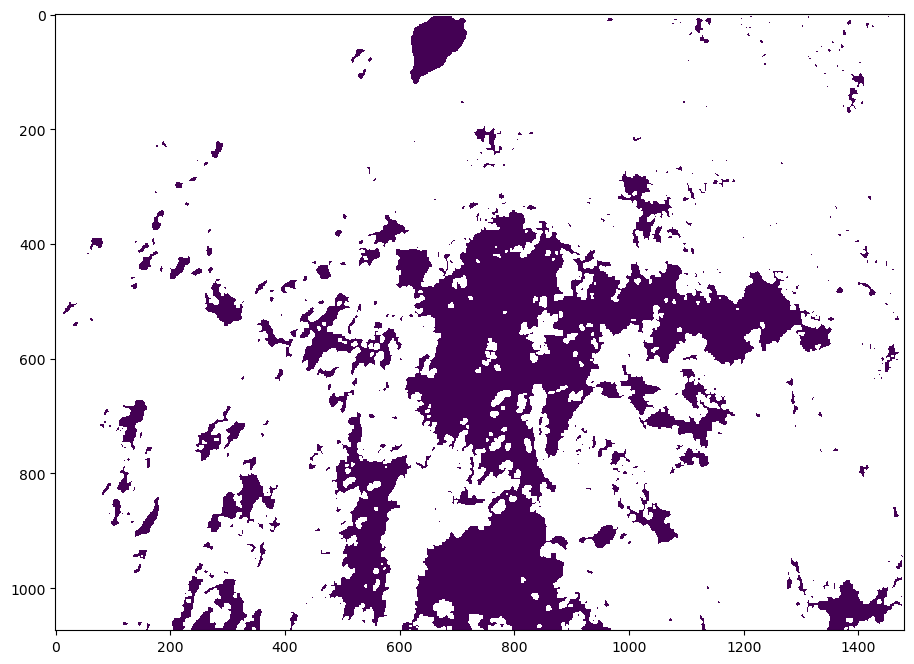

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image3)
plt.show()

## Exercise: Calculate the cloud coverage fraction

In [39]:
# Check if the NumPy array contains any NaN value

if(np.isnan(image).any()):
    print("The Array contain NaN values")
else:
    print("The Array does not contain NaN values")
    

The Array does not contain NaN values


In [40]:
cloud_area = np.nansum(image3) #*pixel_area in km^2 to get physical units

print(cloud_area)

total_area = image3.size #*pixel_area in km^2 to get physical units

print(total_area)

335729.0
1589520


In [41]:
filling_factor = cloud_area/total_area

In [42]:
print("The cloud area filling factor is:", filling_factor)

The cloud area filling factor is: 0.21121407720569732


## Exercise: Make a map of only cloud intensity

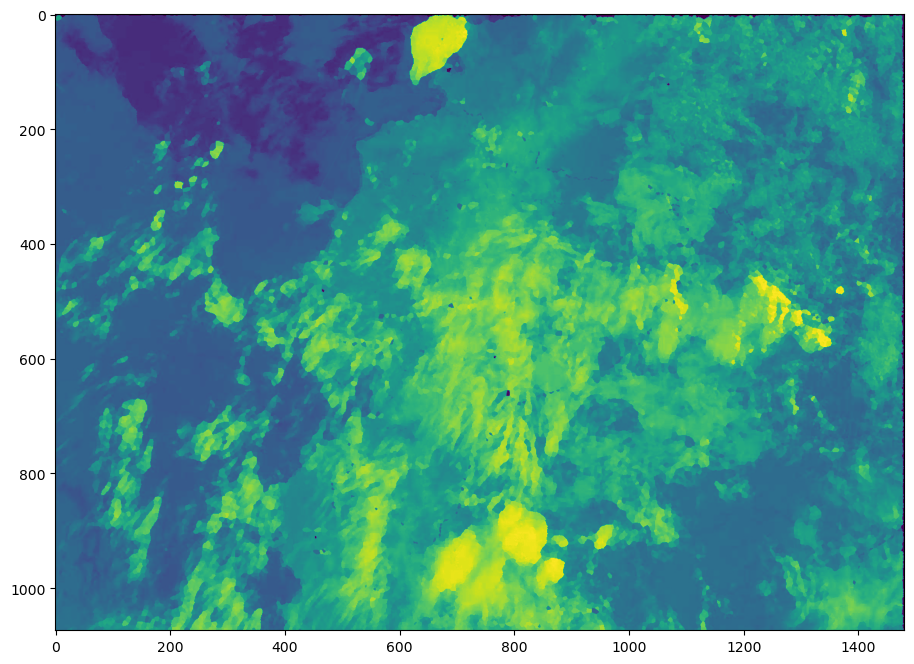

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(GD2)
plt.show()

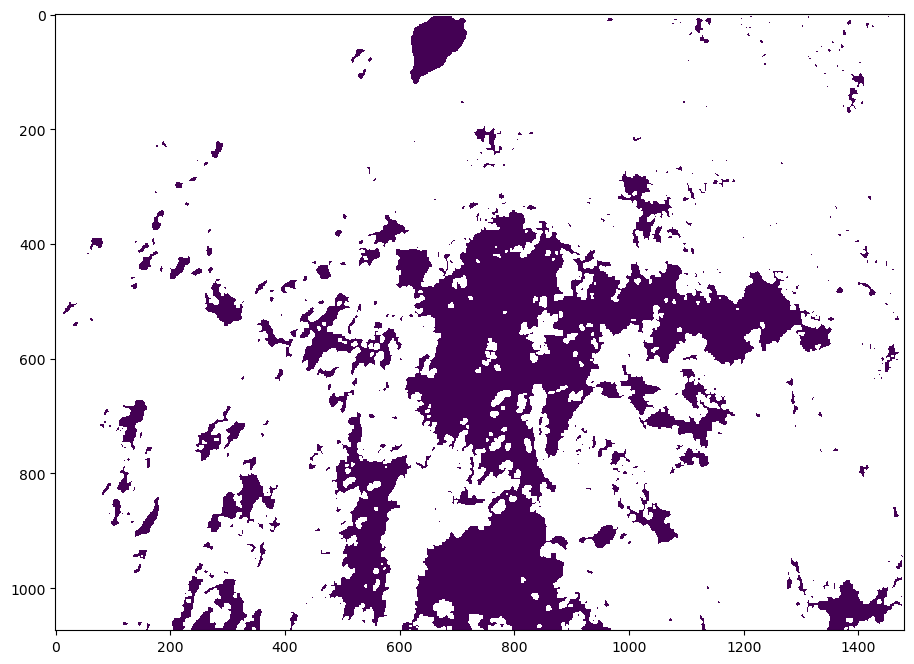

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image3)
plt.show()

In [45]:
image4 = image3*GD2

### Map of cloud intensity

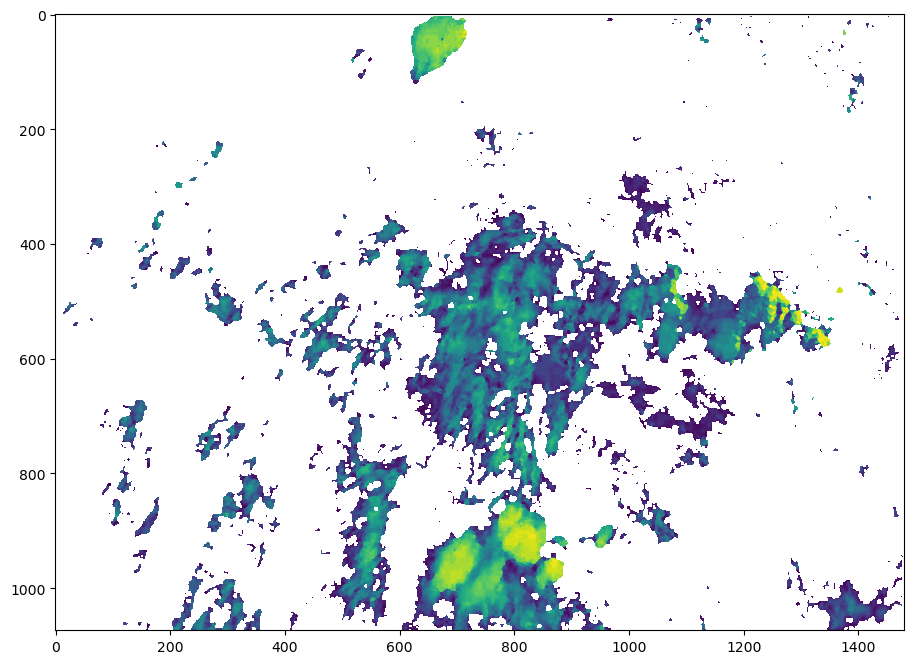

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image4)
plt.show()

Text(0.5, 1.0, 'Clouds')

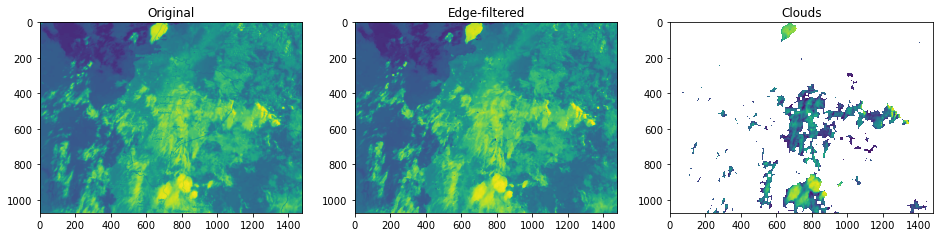

In [47]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,8))
ax1.imshow(image, cmap = 'viridis')
ax1.set_title("Original")
ax2.imshow(GD2, cmap = 'viridis')
ax2.set_title("Edge-filtered")
ax3.imshow(image4, cmap = 'viridis')
ax3.set_title("Clouds")

## Cloud histogram

In [48]:
image4_1D = image4.reshape(image4.size)

print(image4_1D.shape)

(1589520,)


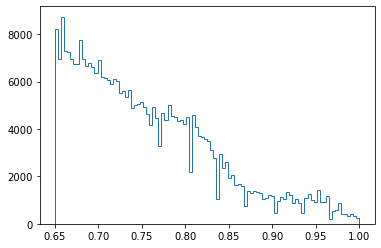

In [49]:
plt.hist(image4_1D, bins=100, histtype = 'step')
plt.show()